In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime

In [2]:
from pandas import read_table
train=read_table('D:\game\zhengqi_train.txt')
y=train['target']
x=train.drop(['target'],axis=1,inplace=True)

In [3]:
##可以看出test 和train 是没有空缺值，因此不需要进行处理
test=read_table('D:\game\zhengqi_test.txt')
test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
V0     1925 non-null float64
V1     1925 non-null float64
V2     1925 non-null float64
V3     1925 non-null float64
V4     1925 non-null float64
V5     1925 non-null float64
V6     1925 non-null float64
V7     1925 non-null float64
V8     1925 non-null float64
V9     1925 non-null float64
V10    1925 non-null float64
V11    1925 non-null float64
V12    1925 non-null float64
V13    1925 non-null float64
V14    1925 non-null float64
V15    1925 non-null float64
V16    1925 non-null float64
V17    1925 non-null float64
V18    1925 non-null float64
V19    1925 non-null float64
V20    1925 non-null float64
V21    1925 non-null float64
V22    1925 non-null float64
V23    1925 non-null float64
V24    1925 non-null float64
V25    1925 non-null float64
V26    1925 non-null float64
V27    1925 non-null float64
V28    1925 non-null float64
V29    1925 non-null float64
V30    1925 non-null fl

In [14]:
dfull = xgb.DMatrix(train,y)
param1 = {'silent':True #并非默认
          ,'obj':'reg:linear' #并非默认
          ,"subsample":1  #随机抽样的时候抽取的样本比例
          ,"max_depth":6  #最大深度
          ,"eta":0.3      #树的迭代速率
          ,"gamma":0      #gamma是对梯度提升树影响最大的参数之一
          ,"lambda":1     #L2正则项
          ,"alpha":0      #L1正则项
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"colsample_bynode":1
          ,"nfold":5}
num_round = 200
cvresult1 = xgb.cv(param1, dfull, num_round)
print('完全是OK的！')

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoostError: b"Invalid Parameter format for max_depth expect int but value='1.5'"

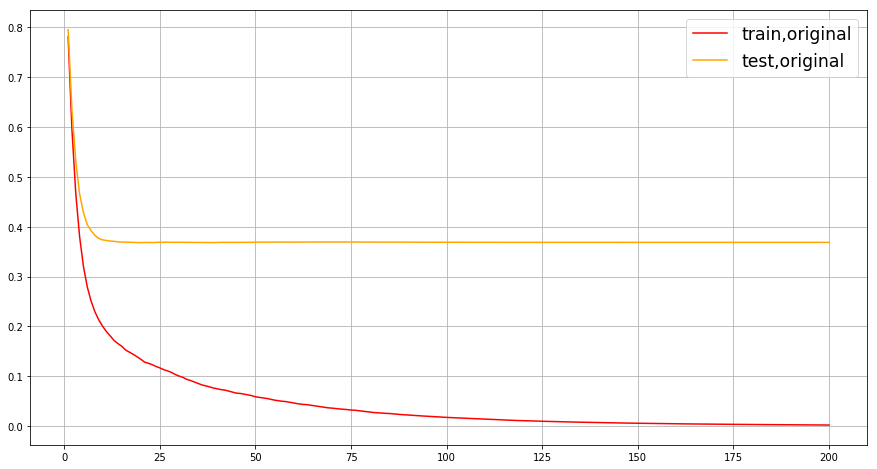

In [15]:
fig,ax = plt.subplots(1,figsize=(15,8))
#ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


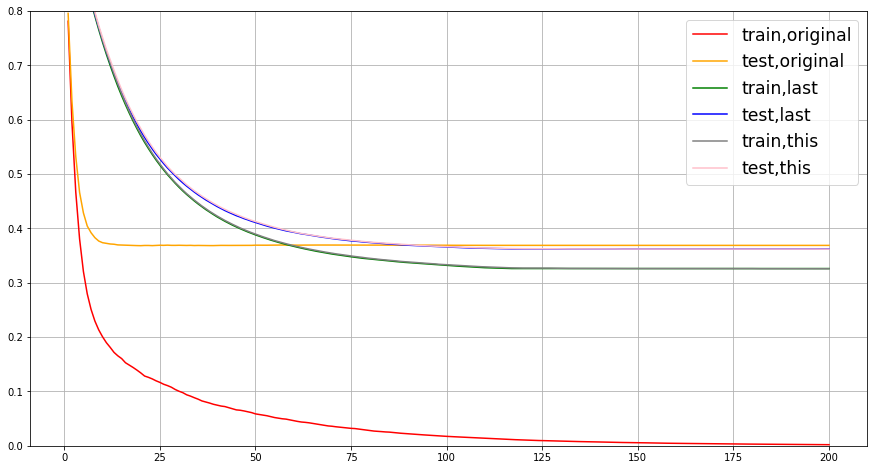

In [15]:
dfull = xgb.DMatrix(train,y)
param1 = {'silent':True
            ,'obj':'reg:linear'
            ,"subsample":1
            ,"max_depth":6  #调试出来max_depth=2是最好的
            ,"eta":0.3
            ,"gamma":0
            ,"lambda":1
            ,"alpha":0
            ,"colsample_bytree":1
            ,"colsample_bylevel":1
            ,"colsample_bynode":1
            ,"nfold":5}
num_round = 200
cvresult1 = xgb.cv(param1, dfull, num_round)
fig,ax = plt.subplots(1,figsize=(15,8))
ax.set_ylim(top=0.8)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
param2 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,'eta':0.05
          ,'gamma':2
          ,'lambda':1
           ,'alpha':0
          ,"colsample_bytree":1
          ,"colsample_bylevel":1
          ,"nfold":5}
param3 = {'silent':True
          ,'obj':'reg:linear'
          ,"max_depth":2
          ,"eta":0.05
          ,'gamma':2
          ,'lambda':1
           ,'alpha':0
          ,"colsample_bytree":1
          ,"colsample_bylevel":0.6
          ,"nfold":5}
#正则化参数 放到后面去调
#可不可以使用网格搜索
cvresult2 = xgb.cv(param2, dfull, num_round)
cvresult3 = xgb.cv(param3, dfull, num_round)
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()
#上述条件速度更快
